#Montamos google drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Leemos los datos desde el archivo en drive y los ponemos en un dataframe.
https://www.kaggle.com/datasets/grikomsn/amazon-cell-phones-reviews?select=20191226-reviews.csv

In [2]:
from pandas.core.frame import DataFrame
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/MCD/4_PCD/Tarea02/CellPhoneReviews.csv')
df.head()

,asin,brand,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Sony,Janet,3,11-Oct-05,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Sony,Luke Wyatt,1,7-Jan-04,False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Sony,Brooke,5,30-Dec-03,False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,Sony,amy m. teague,3,18-Mar-04,False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,Sony,tristazbimmer,4,28-Aug-05,False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [3]:
df.columns = ['asin', 'brand', 'name', 'Score', 'Time', 'verified', 'Summary', 'Text', 'helpfulVotes']
df.size

611874

#Creamos un dataset con los datos que vamos a analizar.

In [4]:
dataset = df[['Score', 'Time', 'Summary', 'Text', 'brand']]
dataset.head()

,Score,Time,Summary,Text,brand
0,3,11-Oct-05,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,Sony
1,1,7-Jan-04,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,Sony
2,5,30-Dec-03,Love This Phone,"This is a great, reliable phone. I also purcha...",Sony
3,3,18-Mar-04,"Love the Phone, BUT...!","I love the phone and all, because I really did...",Sony
4,4,28-Aug-05,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,Sony


In [5]:
rows, cols = dataset.shape

In [6]:
N = rows - 5000
dataset = dataset.iloc[:-N , :]
dataset.shape

(5000, 5)

In [7]:
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the review column
dataset['Cleaned Reviews'] = dataset['Text'].apply(clean)
dataset.head()

,Score,Time,Summary,Text,brand,Cleaned Reviews
0,3,11-Oct-05,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,Sony,I had the Samsung A for awhile which is absolu...
1,1,7-Jan-04,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,Sony,Due to a software issue between Nokia and Spri...
2,5,30-Dec-03,Love This Phone,"This is a great, reliable phone. I also purcha...",Sony,This is a great reliable phone I also purchase...
3,3,18-Mar-04,"Love the Phone, BUT...!","I love the phone and all, because I really did...",Sony,I love the phone and all because I really did ...
4,4,28-Aug-05,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,Sony,The phone has been great for every purpose it ...


In [8]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

dataset['POS tagged'] = dataset['Cleaned Reviews'].apply(token_stop_pos)
dataset.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,Score,Time,Summary,Text,brand,Cleaned Reviews,POS tagged
0,3,11-Oct-05,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,Sony,I had the Samsung A for awhile which is absolu...,"[(Samsung, n), (awhile, n), (absolute, a), (do..."
1,1,7-Jan-04,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,Sony,Due to a software issue between Nokia and Spri...,"[(Due, a), (software, n), (issue, n), (Nokia, ..."
2,5,30-Dec-03,Love This Phone,"This is a great, reliable phone. I also purcha...",Sony,This is a great reliable phone I also purchase...,"[(great, a), (reliable, a), (phone, n), (also,..."
3,3,18-Mar-04,"Love the Phone, BUT...!","I love the phone and all, because I really did...",Sony,I love the phone and all because I really did ...,"[(love, v), (phone, n), (really, r), (need, v)..."
4,4,28-Aug-05,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,Sony,The phone has been great for every purpose it ...,"[(phone, n), (great, a), (every, None), (purpo..."


In [9]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
dataset['Lemma'] = dataset['POS tagged'].apply(lemmatize)
dataset.head()

,Score,Time,Summary,Text,brand,Cleaned Reviews,POS tagged,Lemma
0,3,11-Oct-05,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,Sony,I had the Samsung A for awhile which is absolu...,"[(Samsung, n), (awhile, n), (absolute, a), (do...",Samsung awhile absolute doo doo read review ...
1,1,7-Jan-04,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,Sony,Due to a software issue between Nokia and Spri...,"[(Due, a), (software, n), (issue, n), (Nokia, ...",Due software issue Nokia Sprint phone text m...
2,5,30-Dec-03,Love This Phone,"This is a great, reliable phone. I also purcha...",Sony,This is a great reliable phone I also purchase...,"[(great, a), (reliable, a), (phone, n), (also,...",great reliable phone also purchase phone sam...
3,3,18-Mar-04,"Love the Phone, BUT...!","I love the phone and all, because I really did...",Sony,I love the phone and all because I really did ...,"[(love, v), (phone, n), (really, r), (need, v)...",love phone really need one expect price bill...
4,4,28-Aug-05,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,Sony,The phone has been great for every purpose it ...,"[(phone, n), (great, a), (every, None), (purpo...",phone great every purpose offer except day b...


In [10]:
dataset[['Text', 'Lemma']]

,Text,Lemma
0,I had the Samsung A600 for awhile which is abs...,Samsung awhile absolute doo doo read review ...
1,Due to a software issue between Nokia and Spri...,Due software issue Nokia Sprint phone text m...
2,"This is a great, reliable phone. I also purcha...",great reliable phone also purchase phone sam...
3,"I love the phone and all, because I really did...",love phone really need one expect price bill...
4,The phone has been great for every purpose it ...,phone great every purpose offer except day b...
...,...,...
4995,Item as described.,Item described
4996,As advertised. Thank you!,advertised Thank
4997,Love Android so it's a great phone,Love Android great phone
4998,It is a great investment perfect size and lots...,great investment perfect size lot power long...


#Analisis de sentimiento usando TextBlob

In [11]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [12]:
fin_data = pd.DataFrame(dataset[['Text', 'Lemma', 'brand']])

In [13]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,Text,Lemma,brand,Polarity,Analysis
0,I had the Samsung A600 for awhile which is abs...,Samsung awhile absolute doo doo read review ...,Sony,0.121731,Positive
1,Due to a software issue between Nokia and Spri...,Due software issue Nokia Sprint phone text m...,Sony,0.196429,Positive
2,"This is a great, reliable phone. I also purcha...",great reliable phone also purchase phone sam...,Sony,0.228889,Positive
3,"I love the phone and all, because I really did...",love phone really need one expect price bill...,Sony,0.318750,Positive
4,The phone has been great for every purpose it ...,phone great every purpose offer except day b...,Sony,-0.006250,Negative


In [14]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Positive    3855
Negative     574
Neutral      571
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f8c05292fd0>,
 [Text(-0.8274034937493315, 0.7248471966776171, 'Positive'),
  Text(0.520212035686446, -0.9692158881936285, 'Negative'),
  Text(1.2640448474569521, -0.47401542550589126, 'Neutral')],
 [Text(-0.4513109965905444, 0.39537119818779115, '77.1%'),
  Text(0.2837520194653341, -0.5286632117419791, '11.5%'),
  Text(0.7958800891395623, -0.2984541568000056, '11.4%')])

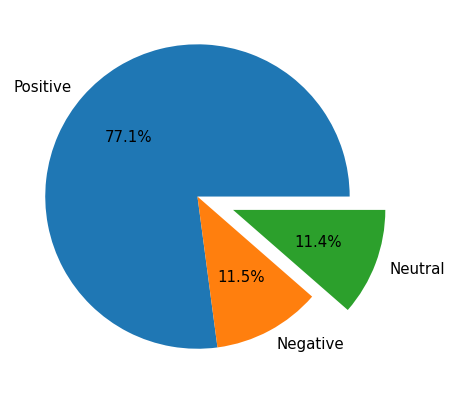

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', textprops={'fontsize': 15}, shadow=False)

#Analisis de sentimiento usando VADER

In [16]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.2 MB/s 


In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

In [18]:
# function to analyse 
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,Text,Lemma,brand,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,I had the Samsung A600 for awhile which is abs...,Samsung awhile absolute doo doo read review ...,Sony,0.121731,Positive,0.8399,Positive
1,Due to a software issue between Nokia and Spri...,Due software issue Nokia Sprint phone text m...,Sony,0.196429,Positive,0.8957,Positive
2,"This is a great, reliable phone. I also purcha...",great reliable phone also purchase phone sam...,Sony,0.228889,Positive,0.8957,Positive
3,"I love the phone and all, because I really did...",love phone really need one expect price bill...,Sony,0.318750,Positive,0.9136,Positive
4,The phone has been great for every purpose it ...,phone great every purpose offer except day b...,Sony,-0.006250,Negative,0.8957,Positive


In [19]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Positive    2882
Neutral     1801
Negative     317
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f8c05442e10>,
 [Text(-0.28526369209643726, 1.1656005430555998, 'Positive'),
  Text(0.044912120884218094, -1.0990827545720485, 'Neutral'),
  Text(1.0782526904685057, -0.21764911095023812, 'Negative')],
 [Text(-0.16640382038958837, 0.6799336501157666, '57.6%'),
  Text(0.024497520482300774, -0.5994996843120264, '36.0%'),
  Text(0.5881378311646394, -0.11871769688194805, '6.3%')])

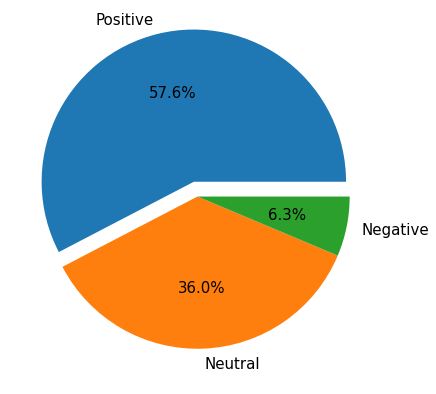

In [20]:
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', textprops={'fontsize': 15}, shadow=False)

#Analisis using SentiWordNet

In [21]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

fin_data['SWN analysis'] = dataset['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


,Text,Lemma,brand,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,I had the Samsung A600 for awhile which is abs...,Samsung awhile absolute doo doo read review ...,Sony,0.121731,Positive,0.8399,Positive,Negative
1,Due to a software issue between Nokia and Spri...,Due software issue Nokia Sprint phone text m...,Sony,0.196429,Positive,0.8957,Positive,Positive
2,"This is a great, reliable phone. I also purcha...",great reliable phone also purchase phone sam...,Sony,0.228889,Positive,0.8957,Positive,Positive
3,"I love the phone and all, because I really did...",love phone really need one expect price bill...,Sony,0.318750,Positive,0.9136,Positive,Positive
4,The phone has been great for every purpose it ...,phone great every purpose offer except day b...,Sony,-0.006250,Negative,0.8957,Positive,Positive


In [22]:
fin_data.to_csv('/content/drive/MyDrive/MCD/4_PCD/Tarea02/fin_data.csv')

In [23]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Positive    3348
Negative    1036
Neutral      491
0            125
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f8bfcc8c050>,
 [Text(-0.5587553406824377, 0.9475191128725865, 'Positive'),
  Text(0.1597797143412647, -1.0883337920348812, 'Negative'),
  Text(0.9829155218580409, -0.49383912045375195, 'Neutral'),
  Text(1.0966090760959442, -0.0863048910780838, '0')],
 [Text(-0.30477564037223875, 0.5168286070214108, '67.0%'),
  Text(0.08715257145887165, -0.5936366138372079, '20.7%'),
  Text(0.536135739195295, -0.2693667929747737, '9.8%'),
  Text(0.5981504051432422, -0.047075395133500245, '2.5%')])

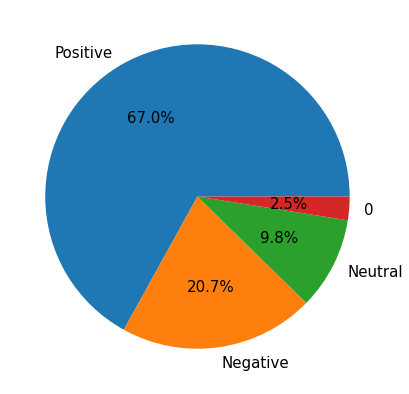

In [24]:
swn_counts= fin_data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, autopct='%1.1f%%', textprops={'fontsize': 15}, shadow=False)

([<matplotlib.patches.Wedge at 0x7f8bfcbffd50>,
 [Text(-0.5587553406824377, 0.9475191128725865, 'Positive'),
  Text(0.1597797143412647, -1.0883337920348812, 'Negative'),
  Text(1.2063054131894138, -0.606075284193241, 'Neutral'),
  Text(1.0966090760959442, -0.0863048910780838, '0')],
 [Text(-0.30477564037223875, 0.5168286070214108, '67.0%'),
  Text(0.08715257145887165, -0.5936366138372079, '20.7%'),
  Text(0.7595256305266679, -0.3816029567142628, '9.8%'),
  Text(0.5981504051432422, -0.047075395133500245, '2.5%')])

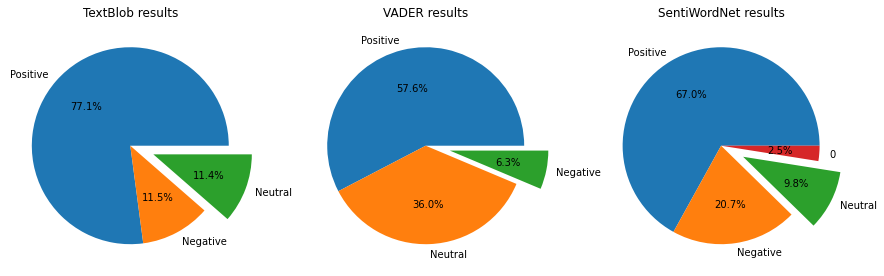

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25, 0), autopct='%1.1f%%', shadow=False)

#Analisis de sentimiento con sklearn

In [26]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

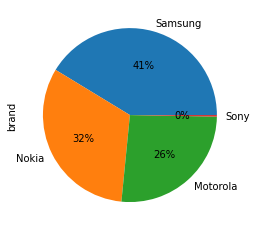

In [27]:
fin_data.brand.value_counts().plot(kind='pie', autopct='%1.0f%%')

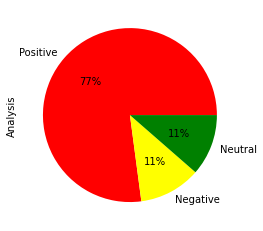

In [28]:
fin_data.Analysis.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [29]:
fin_data.head()

,Text,Lemma,brand,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,I had the Samsung A600 for awhile which is abs...,Samsung awhile absolute doo doo read review ...,Sony,0.121731,Positive,0.8399,Positive,Negative
1,Due to a software issue between Nokia and Spri...,Due software issue Nokia Sprint phone text m...,Sony,0.196429,Positive,0.8957,Positive,Positive
2,"This is a great, reliable phone. I also purcha...",great reliable phone also purchase phone sam...,Sony,0.228889,Positive,0.8957,Positive,Positive
3,"I love the phone and all, because I really did...",love phone really need one expect price bill...,Sony,0.318750,Positive,0.9136,Positive,Positive
4,The phone has been great for every purpose it ...,phone great every purpose offer except day b...,Sony,-0.006250,Negative,0.8957,Positive,Positive


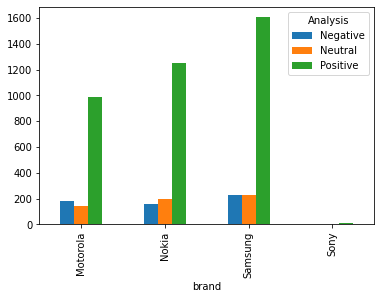

In [30]:
book_sentiment = fin_data.groupby(['brand', 'Analysis']).Analysis.count().unstack()
book_sentiment.plot(kind = 'bar')

In [31]:
# Books
# features = fin_data.iloc[:, 0].values
# labels = fin_data.iloc[:, 3].values

# Cellphones
features = fin_data.iloc[:, 0].values
labels = fin_data.iloc[:, 4].values

In [32]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [33]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [35]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [36]:
predictions = text_classifier.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[ 41  13  73]
 [  1  72  32]
 [  3  15 750]]
              precision    recall  f1-score   support

    Negative       0.91      0.32      0.48       127
     Neutral       0.72      0.69      0.70       105
    Positive       0.88      0.98      0.92       768

    accuracy                           0.86      1000
   macro avg       0.84      0.66      0.70      1000
weighted avg       0.86      0.86      0.84      1000

0.863
